In [1]:
#Importation de librairies
import pandas as pd

In [2]:
repertoire = "./Data/Reseaux/"
fichier_utilisateurs = repertoire + "utilisateurs.csv"
fichier_temps_passe = repertoire + "reseaux_sociaux.csv"

In [3]:
df_utilisateurs = pd.read_csv(fichier_utilisateurs, encoding="latin-1")

df_donnees = pd.read_csv(fichier_temps_passe, encoding="latin-1")

display(df_utilisateurs)
display(df_donnees)

,id,prénom,nom,date de naissance,adresse IP
0,1,Alba,Henry,1994-08-11,115.199.131.20
1,2,Adèle,Masson,1996-10-11,169.15.124.179
2,3,Eden,Brunet,1993-07-21,236.211.89.59
3,4,Adam,Lefevre,1990-11-12,234.79.33.41
4,5,Gabin,Gerard,1993-07-25,197.121.136.20
...,...,...,...,...,...
9995,9996,Charlie,Rolland,2001-09-21,13.32.252.95
9996,9997,Mia,Mercier,2001-07-22,155.252.161.37
9997,9998,Victor,Girard,2004-11-25,78.251.164.33
9998,9999,Jade,Roger,1991-10-22,89.247.107.245


,id,adresse IP,site,temps passé
0,1,115.199.131.20,WhatsApp,336.9
1,2,169.15.124.179,TikTok,250.5
2,3,169.15.124.179,QQ,51.0
3,4,169.15.124.179,WeChat,82.9
4,5,236.211.89.59,WhatsApp,283.0
...,...,...,...,...
45017,45018,89.247.107.245,Pinterest,65.5
45018,45019,89.247.107.245,LinkedIn,100.6
45019,45020,132.124.158.125,WeChat,110.2
45020,45021,132.124.158.125,Facebook,210.3


In [4]:
df_utilisateurs.rename(columns={'id': 'id_utilisateur'}, inplace=True)

df_donnees.rename(columns={'id': 'id_data'}, inplace=True)

display(df_utilisateurs)
display(df_donnees)

,id_utilisateur,prénom,nom,date de naissance,adresse IP
0,1,Alba,Henry,1994-08-11,115.199.131.20
1,2,Adèle,Masson,1996-10-11,169.15.124.179
2,3,Eden,Brunet,1993-07-21,236.211.89.59
3,4,Adam,Lefevre,1990-11-12,234.79.33.41
4,5,Gabin,Gerard,1993-07-25,197.121.136.20
...,...,...,...,...,...
9995,9996,Charlie,Rolland,2001-09-21,13.32.252.95
9996,9997,Mia,Mercier,2001-07-22,155.252.161.37
9997,9998,Victor,Girard,2004-11-25,78.251.164.33
9998,9999,Jade,Roger,1991-10-22,89.247.107.245


,id_data,adresse IP,site,temps passé
0,1,115.199.131.20,WhatsApp,336.9
1,2,169.15.124.179,TikTok,250.5
2,3,169.15.124.179,QQ,51.0
3,4,169.15.124.179,WeChat,82.9
4,5,236.211.89.59,WhatsApp,283.0
...,...,...,...,...
45017,45018,89.247.107.245,Pinterest,65.5
45018,45019,89.247.107.245,LinkedIn,100.6
45019,45020,132.124.158.125,WeChat,110.2
45020,45021,132.124.158.125,Facebook,210.3


In [5]:
df_merge = df_utilisateurs.merge(df_donnees, on="adresse IP", how="left")

df_merge.head(100)

,id_utilisateur,prénom,nom,date de naissance,adresse IP,id_data,site,temps passé
0,1,Alba,Henry,1994-08-11,115.199.131.20,1,WhatsApp,336.9
1,2,Adèle,Masson,1996-10-11,169.15.124.179,2,TikTok,250.5
2,2,Adèle,Masson,1996-10-11,169.15.124.179,3,QQ,51.0
3,2,Adèle,Masson,1996-10-11,169.15.124.179,4,WeChat,82.9
4,3,Eden,Brunet,1993-07-21,236.211.89.59,5,WhatsApp,283.0
...,...,...,...,...,...,...,...,...
95,22,Léna,Nicolas,1990-04-21,34.205.121.50,96,LinkedIn,141.2
96,22,Léna,Nicolas,1990-04-21,34.205.121.50,97,Snapchat,311.4
97,22,Léna,Nicolas,1990-04-21,34.205.121.50,98,YouTube,654.7
98,22,Léna,Nicolas,1990-04-21,34.205.121.50,99,X,214.3


In [6]:
df_merge.groupby(["id_utilisateur"])["temps passé"].sum()

id_utilisateur
1         336.9
2         384.4
3         515.0
4         261.2
5         875.9
          ...  
9996     1001.8
9997     1816.9
9998     1263.2
9999     1528.5
10000     803.2
Name: temps passé, Length: 10000, dtype: float64

In [7]:
df_tps_passe = df_merge.groupby(["id_utilisateur"]).agg(temps_total=("temps passé", "sum"))
df_tps_passe

,temps_total
id_utilisateur,
1,336.9
2,384.4
3,515.0
4,261.2
5,875.9
...,...
9996,1001.8
9997,1816.9
9998,1263.2


In [8]:
df_merge.groupby(["nom", "prénom"])["temps passé"].sum()

nom      prénom  
Andre    Aaron       2539.2
         Adam        1497.1
         Adèle       2607.8
         Agathe       867.7
         Alba        2371.7
                      ...  
Vincent  Tom         2768.0
         Valentin     436.1
         Victoire    2630.6
         Victor      2464.0
         Victoria     549.4
Name: temps passé, Length: 6351, dtype: float64

In [9]:
df_tps_passe2 = df_merge.groupby(["nom", "prénom"]).agg(temps_total=("temps passé", "sum"))
df_tps_passe2

temps_total
nom     prénom               
Andre   Aaron          2539.2
        Adam           1497.1
        Adèle          2607.8
        Agathe          867.7
        Alba           2371.7
...                       ...
Vincent Tom            2768.0
        Valentin        436.1
        Victoire       2630.6
        Victor         2464.0
        Victoria        549.4

[6351 rows x 1 columns]

In [10]:
df_classement_site = df_merge.groupby(["site"]).agg(temps_total=("temps passé", "sum")).sort_values("temps_total", ascending=False)

df_classement_site

,temps_total
site,
YouTube,1718610.8
TikTok,1053983.3
Instagram,1044258.2
WhatsApp,1028667.5
Snapchat,881980.6
LinkedIn,521958.8
Facebook,517145.5
X,516393.3
Facebook Messenger,513668.5


In [27]:
df_classement_site.index.to_list()

['YouTube',
 'TikTok',
 'Instagram',
 'WhatsApp',
 'Snapchat',
 'LinkedIn',
 'Facebook',
 'X',
 'Facebook Messenger',
 'Twitch',
 'WeChat',
 'Pinterest',
 'QQ']

In [33]:
df_classement_site["temps_total"].to_list()

[1718610.8,
 1053983.3,
 1044258.2,
 1028667.5,
 881980.6,
 521958.8,
 517145.5,
 516393.3,
 513668.5,
 350897.9,
 348394.1,
 343995.4,
 176460.1]

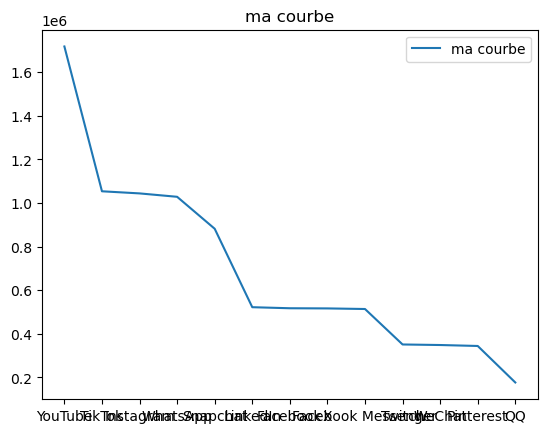

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = df_classement_site.index
y = df_classement_site["temps_total"]
plt.plot(x, y, label='ma courbe')
plt.title('ma courbe')
plt.legend()
plt.show()


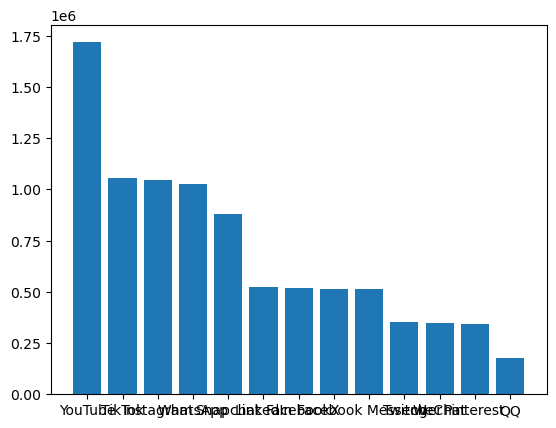

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sites = df_classement_site.index
tps = df_classement_site["temps_total"]

ax.bar(sites, tps)

plt.show()

In [ ]:
temps_total_tous_sites = df_classement_site["temps_total"].sum()

df_classement_site["pourcentage temps"] = (df_classement_site["temps_total"] / temps_total_tous_sites) * 100
df_classement_site

In [ ]:
df_merge["année de naissance"] = df_merge["date de naissance"].apply(lambda date: int(date[:4]))

df_merge

In [ ]:
df_classement_site_annee_naissance = df_merge.pivot_table(index=["site"], columns=["année de naissance"], values="temps passé", aggfunc="mean")
df_classement_site_annee_naissance

In [ ]:
from statistics import mean

df_classement_site_annee_naissance2 = df_merge.pivot_table(index=["site"], columns=["année de naissance"], values="temps passé", aggfunc=lambda lst:round(mean(lst), 2))
df_classement_site_annee_naissance2

In [ ]:
df_merge.pivot_table(index=["site", "année de naissance"], values="temps passé", aggfunc=lambda lst:round(mean(lst), 2))